### Description: This dataset includes real-time and historical traffic congestion data from Chicago, including traffic flow, speed, and incident reports. It's valuable for studying traffic patterns in urban environments.

## Dataset Overview

#### 1. `ID`: A unique identifier for each traffic count record.

#### 2. `Traffic Volume Count Location Address`: The address where the traffic volume was recorded.

#### 3. `Street`: The street name where the traffic count was taken.

#### 4. `Date of Count`: The date on which the traffic count was recorded.

#### 5. `Total Passing Vehicle Volume`: The total number of vehicles that passed the location during the count period.

#### 6. ` Vehicle Volume By Each Direction of Traffic`: The vehicle count divided by direction (e.g., East Bound, West Bound).

#### 7. `Latitude`: The latitude coordinate of the traffic count location.

#### 8. `Longitude`: The longitude coordinate of the traffic count location.

#### 9. `Location`: The geographic location as a tuple of latitude and longitude.

Check out the [City of Chicago Traffic Data](https://www.chicago.gov/city/en/depts/cdot/dataset/average_daily_trafficcounts.html) for more information.


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/username/repository/blob/main/notebook.ipynb)

## Import Necessary Libraries.

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

from sklearn.metrics import mean_squared_error

In [77]:
np.random.seed(42)

## Load The Data.

In [78]:
df_traffic = pd.read_csv("../DataSet/Average_Daily_Traffic_Counts_-_2006.csv")

### Change the datatype of the `Date of Count` from object to datetime.
### drop and `ID`, `Location`.
### Set new column `Date` as index.
### sort the values in the dataframe based on the `date`.

In [79]:
df_traffic['Date'] = pd.to_datetime(df_traffic['Date of Count'], format='%m/%d/%Y')
df_traffic.drop(columns=['ID ', 'Location'], axis=1, inplace=True)
df_traffic.set_index('Date', inplace=True)
df_traffic = df_traffic.sort_values(by='Date')


## Shape Of The Data.

In [80]:
df_traffic.shape

(1279, 7)

## Head values.

In [81]:
df_traffic.head().T

Date,2006-02-01,2006-02-01,2006-02-28,2006-02-28,2006-02-28
Traffic Volume Count Location Address,6820 South,5325 South,758 West,7718 South,1275 West
Street,Cottage Grove Ave,Cottage Grove Ave,71st Street,Dr Martin Luther King Jr Dr,71st Street
Date of Count,02/01/2006,02/01/2006,02/28/2006,02/28/2006,02/28/2006
Total Passing Vehicle Volume,21700,13700,21600,16700,16500
Vehicle Volume By Each Direction of Traffic,North Bound: 10300 / South Bound: 11400,North Bound: 7200 / South Bound: 6500,East Bound: 10400 / West Bound: 11200,North Bound: 7900 / South Bound: 8800,East Bound: 7800 / West Bound: 8700
Latitude,41.770685,41.797881,41.765204,41.754187,41.765008
Longitude,-87.605711,-87.606302,-87.644371,-87.615027,-87.657067


## Summary statistics of the numerical attributes.

In [82]:
df_traffic.describe()

,Total Passing Vehicle Volume,Latitude,Longitude
count,1279.000000,1279.000000,1279.000000
mean,19466.301798,41.849394,-87.670298
std,12448.378467,0.083917,0.060891
min,700.000000,41.651861,-87.854842
25%,11350.000000,41.780249,-87.710013
50%,17300.000000,41.871380,-87.662850
75%,24200.000000,41.909196,-87.628631
max,165200.000000,42.017888,-87.529702


## Summary statistics of the categorical attributes.

In [83]:
df_traffic.describe(include='O')

,Traffic Volume Count Location Address,Street,Date of Count,Vehicle Volume By Each Direction of Traffic
count,1279,1279,1279,1279
unique,1203,251,95,1223
top,210 South,Damen Ave,03/28/2006,North Bound: 6300 / South Bound: 6200
freq,4,33,73,4


## Information about the dataset.

In [84]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2006-02-01 to 2007-06-19
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Traffic Volume Count Location  Address       1279 non-null   object 
 1   Street                                       1279 non-null   object 
 2   Date of Count                                1279 non-null   object 
 3   Total Passing Vehicle Volume                 1279 non-null   int64  
 4   Vehicle Volume By Each Direction of Traffic  1279 non-null   object 
 5   Latitude                                     1279 non-null   float64
 6   Longitude                                    1279 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 79.9+ KB


## Ploting

### Total Traffic Vehicle Volume Of All Time.

#### store the 'Total Passing Vehicle Volume' column in a numpy array


In [85]:
traffic_volume = df_traffic['Total Passing Vehicle Volume'].values

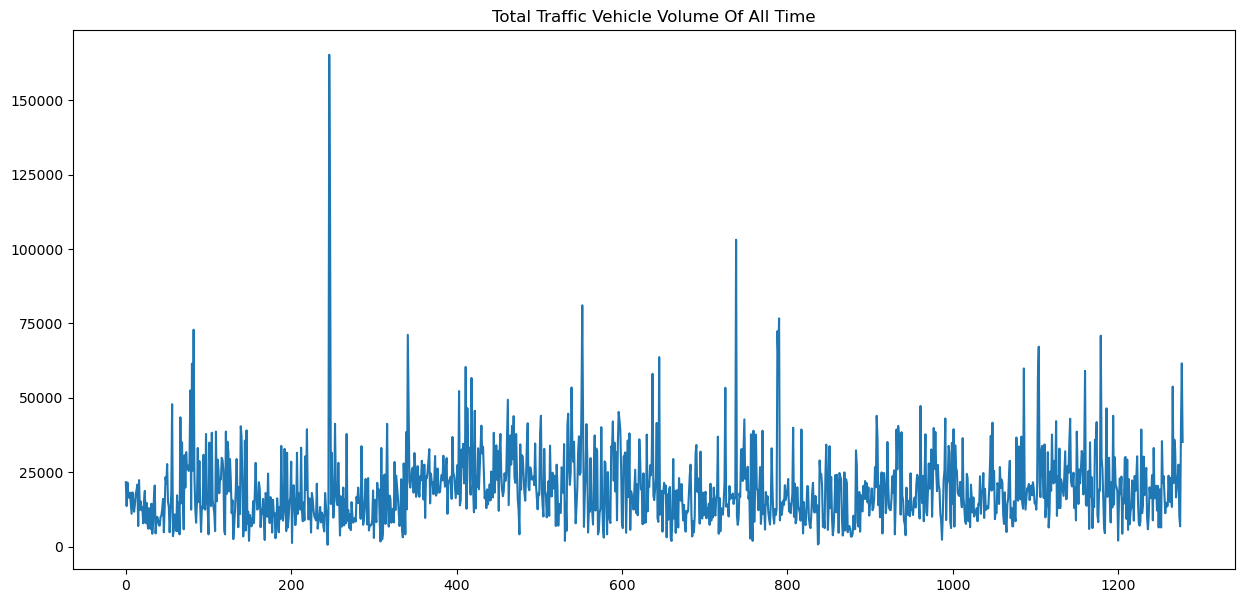

In [86]:
plt.figure(figsize=(15, 7))
plt.plot(traffic_volume)
plt.title("Total Traffic Vehicle Volume Of All Time")
plt.show()

### Total Traffic Vehicle Volume Of The First 100 Days In The DataSet.

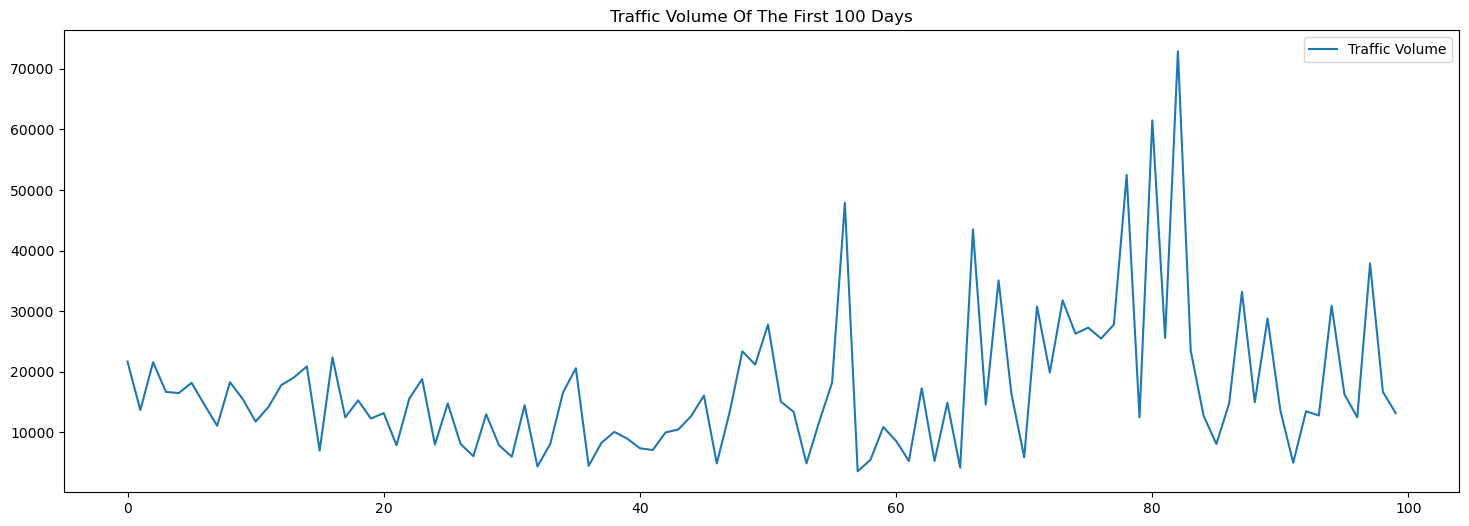

In [87]:
plt.figure(figsize=(18, 6))
plt.plot(traffic_volume[ :100])
plt.title("Traffic Volume Of The First 100 Days")
plt.legend(['Traffic Volume'])

## Apply ETS, (Error Trend Seasonality ).

In [88]:
result = seasonal_decompose(df_traffic['Total Passing Vehicle Volume'], model='additive', period=1)

### plot the result.

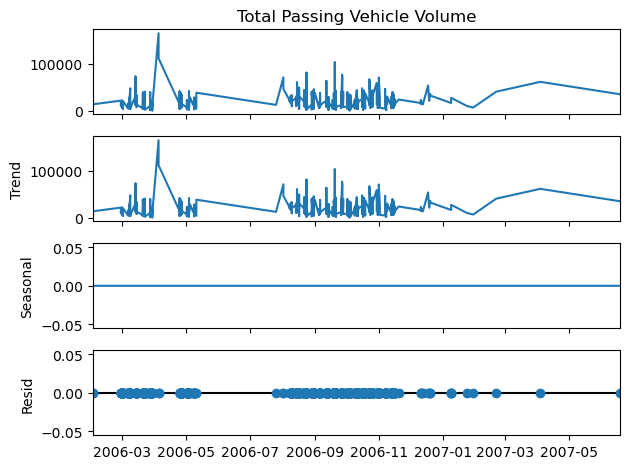

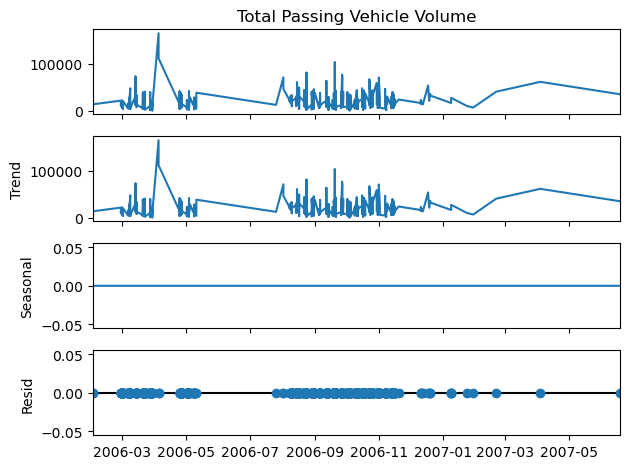

In [89]:
result.plot()

## Data visualization.

### Data visualization for the Latitude and Longitude.

In [90]:
fig = px.scatter_mapbox(df_traffic, lat="Latitude", lon="Longitude", color="Total Passing Vehicle Volume",
                            hover_name="Date of Count", hover_data=["Total Passing Vehicle Volume"],
                            color_continuous_scale=px.colors.cyclical.IceFire, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

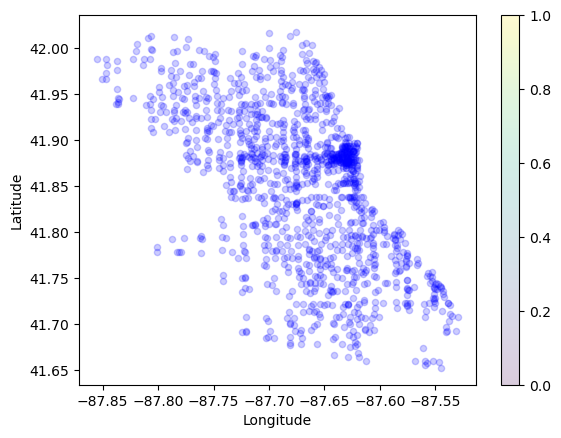

In [91]:
df_traffic.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,c='blue', colorbar=True)

## Top 10 Streets with traffic jams.

<Axes: title={'center': 'Top 10 Streets with traffic jams.'}, xlabel='Street'>

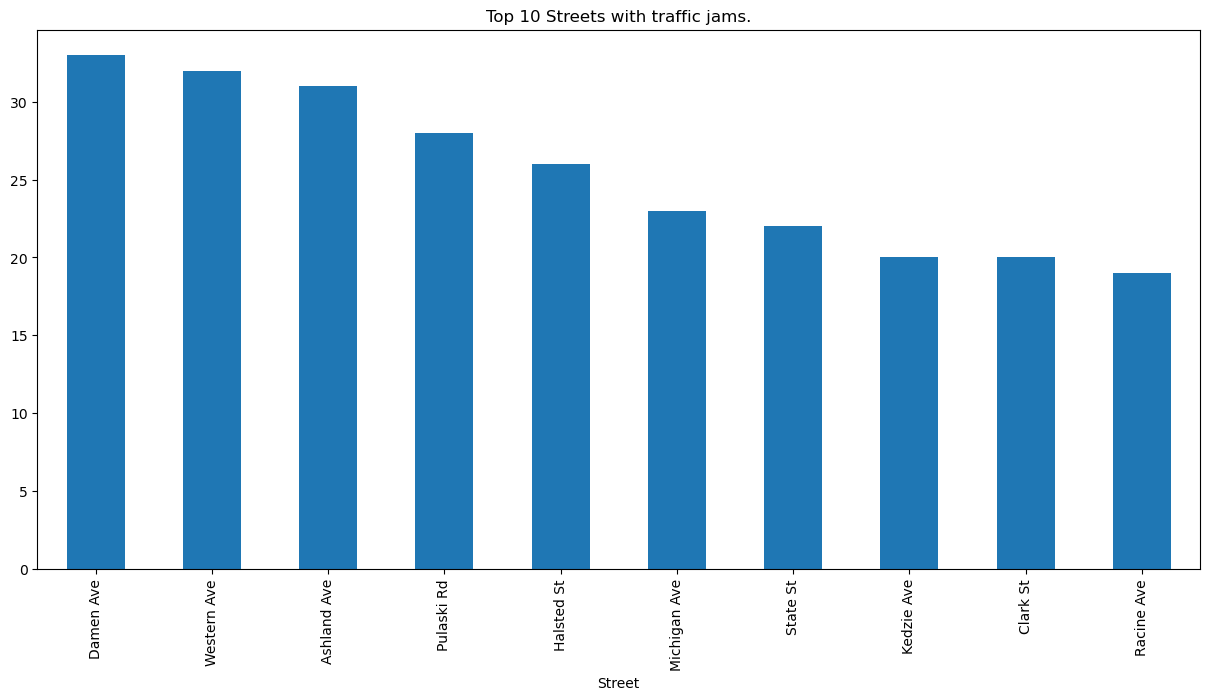

In [92]:
df_traffic['Street'].value_counts().head(10).plot(kind='bar', figsize=(15, 7), title='Top 10 Streets with traffic jams.')

## Data Preprocessing.

## Check for Missing Values.

In [93]:
df_traffic.isnull().sum()

Traffic Volume Count Location  Address         0
Street                                         0
Date of Count                                  0
Total Passing Vehicle Volume                   0
Vehicle Volume By Each Direction of Traffic    0
Latitude                                       0
Longitude                                      0
dtype: int64

## Check for duplicated values.

In [94]:
df_traffic.duplicated().sum()

0

## Preparing the data for training.

### we will start by normalizing the data.

In [95]:
arr_vehicles = df_traffic['Total Passing Vehicle Volume'].values

In [96]:
arr_vehicles

array([21700, 13700, 21600, ..., 40700, 61600, 35200], dtype=int64)

In [97]:
## before normalization
traffic_volume[:10]

array([21700, 13700, 21600, 16700, 16500, 18200, 14600, 11100, 18300,
       15500], dtype=int64)

In [98]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(feature_range=(0, 1))
arr_vehicles = min_max.fit_transform(arr_vehicles.reshape(-1,1))

In [99]:
# after normalization
arr_vehicles[:10]

array([[0.12765957],
       [0.07902736],
       [0.12705167],
       [0.09726444],
       [0.09604863],
       [0.10638298],
       [0.08449848],
       [0.06322188],
       [0.10699088],
       [0.0899696 ]])

In [100]:
arr_vehicles.dtype

dtype('float64')

## Data Splitting
### 70% Train, 15% Validation, 15% Test

In [124]:
train_samples = int(0.7 * len(arr_vehicles))
val_samples = int(0.15 * len(arr_vehicles))
test_samples = len(arr_vehicles) - train_samples - val_samples

In [118]:
print(f"Train samples: {train_samples}")
print(f"Validation samples: {val_samples}")
print(f"Test samples: {test_samples}")

Train samples: 895
Validation samples: 191
Test samples: 193


In [125]:
train, val, test = arr_vehicles[0: train_samples, :], arr_vehicles[train_samples: train_samples + val_samples, :], arr_vehicles[train_samples + val_samples: len(arr_vehicles), :]

## function to prepare the train and test datasets for modeling


In [126]:
def create_dataset(dataset, time_step=7):
  X, Y = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i: (i + time_step), 0]
    X.append(a)
    Y.append(dataset[i + time_step, 0])

  return np.array(X), np.array(Y)

In [127]:
time_step = 10
train_X, trainY = create_dataset(train, time_step)
val_X, val_Y = create_dataset(val, time_step)
test_X, test_Y = create_dataset(test, time_step)

In [128]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
val_X = np.reshape(val_X, (val_X.shape[0], 1, val_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

## LSTM Model

In [123]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, time_step)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
traffic_volume_model = model.fit(train_X, trainY, epochs=100, batch_size=16, verbose=2, validation_data=(val_X, val_Y))

Epoch 1/100
56/56 - 2s - 28ms/step - loss: 0.0105 - val_loss: 0.0038
Epoch 2/100
56/56 - 0s - 2ms/step - loss: 0.0063 - val_loss: 0.0035
Epoch 3/100
56/56 - 0s - 2ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 4/100
56/56 - 0s - 2ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 5/100
56/56 - 0s - 2ms/step - loss: 0.0062 - val_loss: 0.0035
Epoch 6/100
56/56 - 0s - 2ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 7/100
56/56 - 0s - 2ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 8/100
56/56 - 0s - 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 9/100
56/56 - 0s - 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 10/100
56/56 - 0s - 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 11/100
56/56 - 0s - 2ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 12/100
56/56 - 0s - 2ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 13/100
56/56 - 0s - 3ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 14/100
56/56 - 0s - 2ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 15/100
56/56 - 0s - 2ms/step - loss:

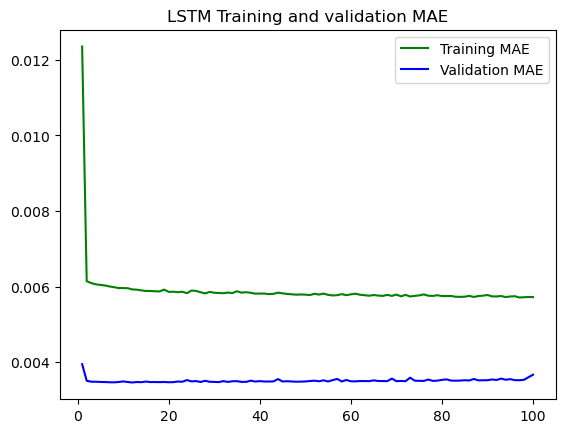

In [108]:
loss = traffic_volume_model.history['loss']
val_loss = traffic_volume_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'g', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('LSTM Training and validation MAE')
plt.legend()
plt.show()

In [109]:
print(traffic_volume_model.history.keys())

dict_keys(['loss', 'val_loss'])


In [110]:
# make predictions
trainPredict = model.predict(train_X)
valPredict = model.predict(val_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = min_max.inverse_transform(trainPredict)
train_Y = min_max.inverse_transform([trainY])
valPredict = min_max.inverse_transform(valPredict)
val_Y = min_max.inverse_transform([val_Y])
testPredict = min_max.inverse_transform(testPredict)
test_Y = min_max.inverse_transform([test_Y])


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


In [111]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(train_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = np.sqrt(mean_squared_error(val_Y[0], valPredict[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))
testScore = np.sqrt(mean_squared_error(test_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12542.24 RMSE
Validation Score: 9969.45 RMSE
Test Score: 11706.76 RMSE


In [112]:
lstmtrainPredictPlot = np.empty_like(arr_vehicles)
lstmtrainPredictPlot[:, :] = np.nan

lstmvalPredictPlot = np.empty_like(arr_vehicles)
lstmvalPredictPlot[:, :] = np.nan

lstmtestPredictPlot = np.empty_like(arr_vehicles)
lstmtestPredictPlot[:, :] = np.nan

trainEnd = len(trainPredict)
valStart = trainEnd + (time_step * 2) + 1
valEnd = valStart + len(valPredict)
testStart = valEnd
testEnd = testStart + len(testPredict)

lstmtrainPredictPlot[time_step:trainEnd + time_step, :] = trainPredict
lstmvalPredictPlot[valStart:valEnd, :] = valPredict
lstmtestPredictPlot[testStart:testEnd, :] = testPredict

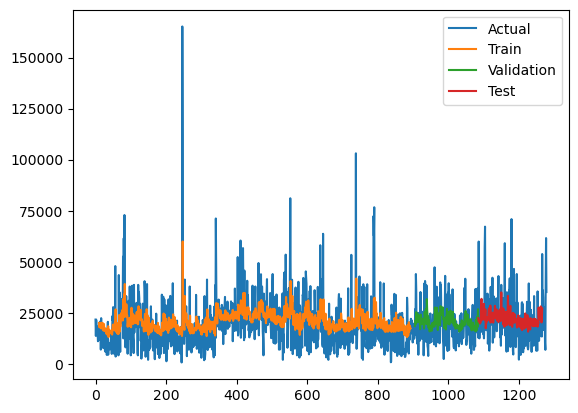

In [113]:
# plot baseline and predictions
figure1 = plt.plot(min_max.inverse_transform(arr_vehicles), label='Actual')
plt.plot(lstmtrainPredictPlot, label='Train')
plt.plot(lstmvalPredictPlot, label='Validation')
plt.plot(lstmtestPredictPlot, label='Test')
plt.legend()
plt.show()

## GRU Model

In [114]:
train_X.shape

(884, 1, 10)

In [115]:
train_Y.shape

(1, 884)

In [129]:
model = Sequential()
model.add(GRU(4, input_shape=(1, time_step)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
traffic_volume_model = model.fit(train_X, trainY, epochs=100, batch_size=16, verbose=2, validation_data=(val_X, val_Y))

Epoch 1/100
56/56 - 2s - 29ms/step - loss: 0.0214 - val_loss: 0.0056
Epoch 2/100
56/56 - 0s - 2ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 3/100
56/56 - 0s - 2ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 4/100
56/56 - 0s - 2ms/step - loss: 0.0075 - val_loss: 0.0045
Epoch 5/100
56/56 - 0s - 2ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 6/100
56/56 - 0s - 2ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 7/100
56/56 - 0s - 2ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 8/100
56/56 - 0s - 2ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 9/100
56/56 - 0s - 2ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 10/100
56/56 - 0s - 2ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 11/100
56/56 - 0s - 2ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 12/100
56/56 - 0s - 2ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 13/100
56/56 - 0s - 2ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 14/100
56/56 - 0s - 2ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 15/100
56/56 - 0s - 2ms/step - loss:

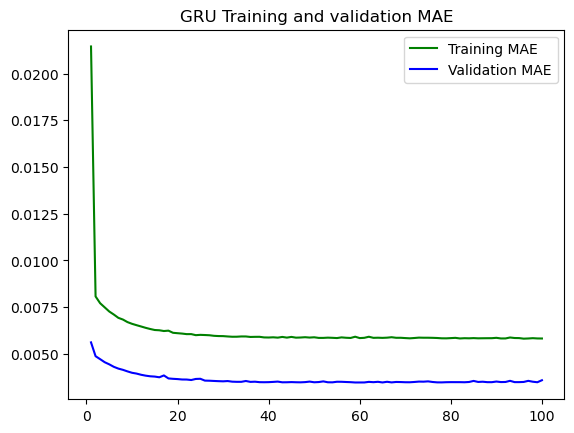

In [130]:
loss = traffic_volume_model.history['loss']
val_loss = traffic_volume_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'g', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('GRU Training and validation MAE')
plt.legend()
plt.show()

In [131]:
# make predictions
trainPredict = model.predict(train_X)
valPredict = model.predict(val_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = min_max.inverse_transform(trainPredict)
train_Y = min_max.inverse_transform([trainY])
valPredict = min_max.inverse_transform(valPredict)
val_Y = min_max.inverse_transform([val_Y])
testPredict = min_max.inverse_transform(testPredict)
test_Y = min_max.inverse_transform([test_Y])

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [132]:
grutrainPredictPlot = np.empty_like(arr_vehicles)
grutrainPredictPlot[:, :] = np.nan

gruvalPredictPlot = np.empty_like(arr_vehicles)
gruvalPredictPlot[:, :] = np.nan

grutestPredictPlot = np.empty_like(arr_vehicles)
grutestPredictPlot[:, :] = np.nan

trainEnd = len(trainPredict)
valStart = trainEnd + (time_step * 2) + 1
valEnd = valStart + len(valPredict)
testStart = valEnd
testEnd = testStart + len(testPredict)

grutrainPredictPlot[time_step:trainEnd + time_step, :] = trainPredict
gruvalPredictPlot[valStart:valEnd, :] = valPredict
grutestPredictPlot[testStart:testEnd, :] = testPredict

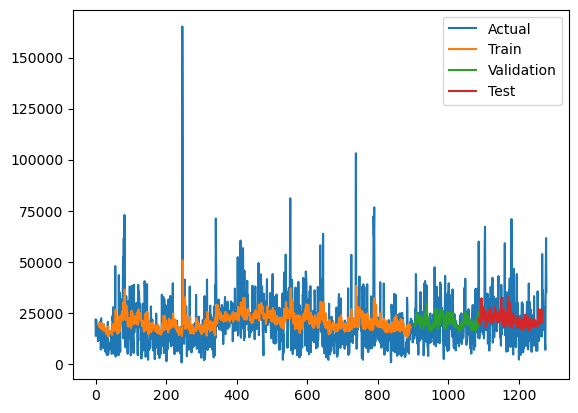

In [133]:
# plot baseline and predictions
figure2 = plt.plot(min_max.inverse_transform(arr_vehicles), label='Actual')
plt.plot(grutrainPredictPlot, label='Train')
plt.plot(gruvalPredictPlot, label='Validation')
plt.plot(grutestPredictPlot, label='Test')
plt.legend()
plt.show()

## Side by side comparison (LSTM v GRU)

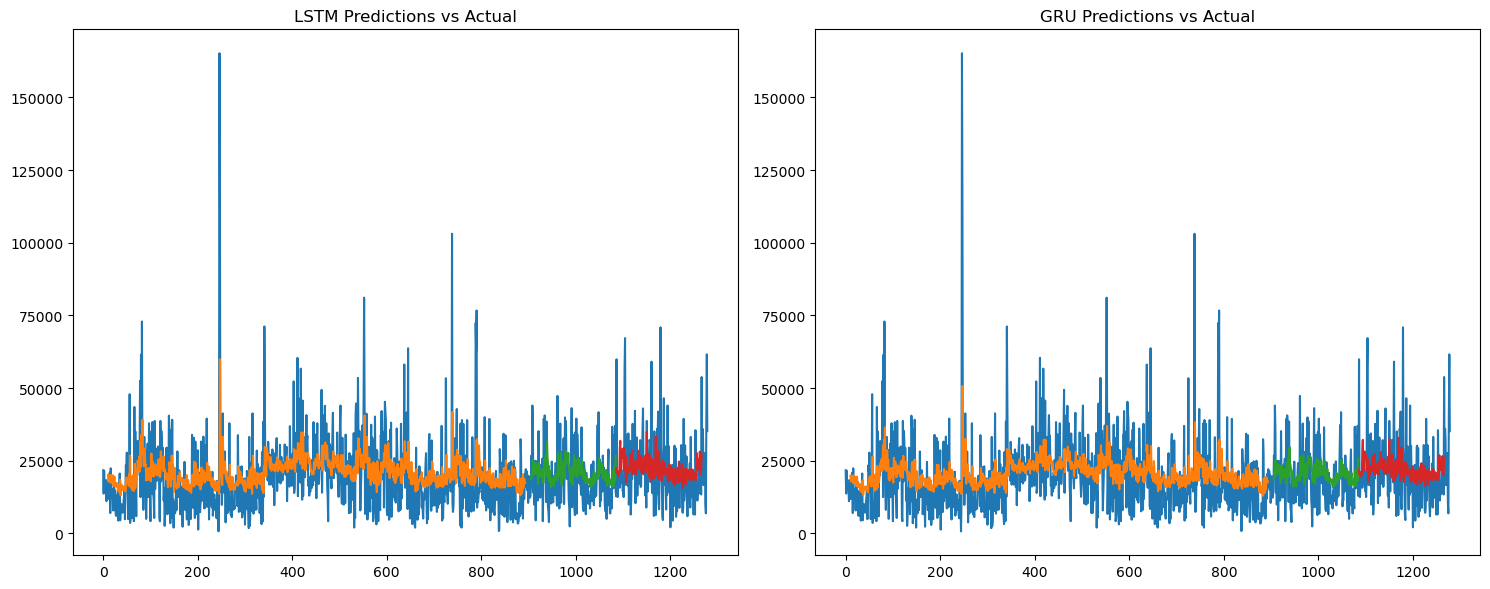

In [139]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(min_max.inverse_transform(arr_vehicles), label='Actual')
plt.plot(lstmtrainPredictPlot, label='Train')
plt.plot(lstmvalPredictPlot, label='Validation')
plt.plot(lstmtestPredictPlot, label='Test')
plt.title('LSTM Predictions vs Actual')

plt.subplot(1, 2, 2)
plt.plot(min_max.inverse_transform(arr_vehicles), label='Actual')
plt.plot(grutrainPredictPlot, label='Train')
plt.plot(gruvalPredictPlot, label='Validation')
plt.plot(grutestPredictPlot, label='Test')
plt.title('GRU Predictions vs Actual')

plt.tight_layout()
plt.show()